# Successive Parabolic Interpolation Method

In [1]:
function [xmin, fmin, iter] = parabolic_interpolation_search(func, x1, x2, x3, tolerance)
    % Initialize variables
    iter = 0; % Iteration counter
    while abs(x3 - x1) > tolerance
        % Calculate function values
        f1 = func(x1); f2 = func(x2); f3 = func(x3);
        
        % Parabolic interpolation formula
        numerator = (x2 - x1)^2 * (f2 - f3) - (x2 - x3)^2 * (f2 - f1);
        denominator = (x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1);
        x0 = x2 - 0.5 * numerator / denominator;

        % Plot the first parabolic interpolation
        if iter == 0
            x123 = [x1 x2 x3];
            f123 = [f1 f2 f3];
            % Create a range of x values for plotting
            xv = linspace(min(x123)-1, max(x123)+1, 100);
            fv = arrayfun(func, xv);
            % Fit a parabolic (second-degree) polynomial to these points
            coeffs = polyfit(x123, f123, 2);
            % Evaluate the polynomial at these x values
            pv = polyval(coeffs, xv);
            plot(xv, fv, 'b-', xv, pv, 'r--',x1, f1, 'go', x2, f2, 'go', x3, f3, 'go');
            title('First Parabolic Interpolation');
            xlabel('x');
            ylabel('f(x)');
            legend('f(x)', 'p(x)', 'Interpolation Points');
            drawnow;
        end
        % Print current approximation and decision
        fprintf('Iteration %d: x1 = %f, x2 = %f, x3 = %f, New approximation x0 = %f\n', iter, x1, x2, x3, x0);
        
        % Update points
        if x0 < x2
            if func(x0) < f2
                x3 = x2;
                x2 = x0;
            else
                x1 = x0;
            end
        else
            if func(x0) < f2
                x1 = x2;
                x2 = x0;
            else
                x3 = x0;
            end
        end
        
        % Increment iteration counter
        iter = iter + 1;
        
    end
   % Final minimum and function value
    xmin = x2;
    fmin = func(x2);
    fprintf('Minimum found at x = %f with f(x) = %f\n', xmin, fmin);
end    


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.



In [2]:
f = @(x) x * sin(x) + x * cos(2 * x);

% Initial guesses and tolerance
x1 = 2;
x2 = 5;
x3 = 8;
tolerance = 0.00001;

Iteration 0: x1 = 2.000000, x2 = 5.000000, x3 = 8.000000, New approximation x0 = 5.020623
Iteration 1: x1 = 2.000000, x2 = 5.000000, x3 = 5.020623, New approximation x0 = 4.064226
Iteration 2: x1 = 4.064226, x2 = 5.000000, x3 = 5.020623, New approximation x0 = 4.763232
Iteration 3: x1 = 4.064226, x2 = 4.763232, x3 = 5.000000, New approximation x0 = 4.776523
Iteration 4: x1 = 4.763232, x2 = 4.776523, x3 = 5.000000, New approximation x0 = 4.795115
Iteration 5: x1 = 4.776523, x2 = 4.795115, x3 = 5.000000, New approximation x0 = 4.795303
Iteration 6: x1 = 4.795115, x2 = 4.795303, x3 = 5.000000, New approximation x0 = 4.795407
Iteration 7: x1 = 4.795303, x2 = 4.795407, x3 = 5.000000, New approximation x0 = 4.795408
Iteration 8: x1 = 4.795407, x2 = 4.795408, x3 = 5.000000, New approximation x0 = 4.795409
Iteration 9: x1 = 4.795408, x2 = 4.795409, x3 = 5.000000, New approximation x0 = 4.795409
Iteration 10: x1 = 4.795409, x2 = 4.795409, x3 = 5.000000, New approximation x0 = 4.795409
Minimum f

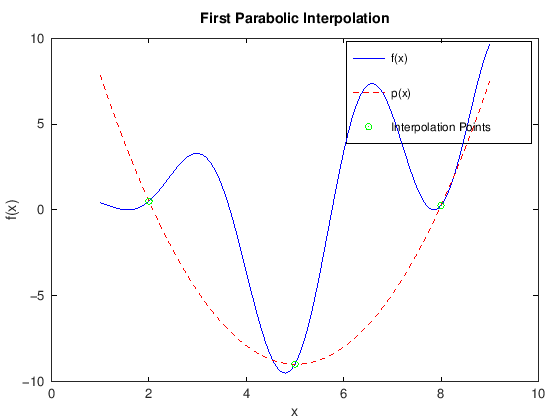

In [3]:
% Find the minimum using parabolic interpolation
[xmin, fmin, iter] = parabolic_interpolation_search(f, x1, x2, x3, tolerance);